<a href="https://colab.research.google.com/github/marcelo-guimaraes/Data-Science/blob/master/Vitoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series: Explorando os registros de temperatura da cidade de Vitória

A cidade de Vitória fica no Espírito Santo, tem população estimada em 3,9 milhões de habitantes e cresceu mais de 25% no decorrer das últimas duas décadas. Hoje analizarei o impacto que esse crescimento teve na temperatura da cidade

### Primeiro importarei algumas bibliotecas e o [dataset](https://www.kaggle.com/volpatto/temperature-timeseries-for-some-brazilian-cities) que irei utilizar

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/drive/My Drive/station_vitoria.csv', index_col = 'YEAR')

In [8]:
df.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,159.194407,192.631525,241.749153,240.753559,239.385932,188.885254,155.164576,155.510508,155.886102,156.733559,239.982034,240.806610,175.545932,207.603729,155.479492,173.223390,206.908305
std,335.828665,367.818120,406.500530,407.034445,407.767526,369.524992,337.437881,337.299488,337.149904,336.811277,407.448306,407.006212,352.746917,382.539180,337.311683,353.740615,382.874827
min,24.560000,25.840000,25.440000,24.620000,22.910000,21.180000,20.240000,21.840000,22.130000,22.590000,23.110000,24.400000,25.350000,24.390000,21.370000,22.830000,23.560000
25%,26.780000,27.280000,27.135000,25.700000,24.040000,22.840000,22.220000,22.575000,22.880000,24.135000,24.800000,25.850000,26.710000,25.765000,22.625000,23.990000,24.900000
50%,27.590000,28.180000,27.770000,26.500000,24.670000,23.780000,22.870000,23.140000,23.390000,24.550000,25.410000,26.500000,27.390000,26.160000,23.100000,24.620000,25.340000
75%,28.455000,29.075000,28.755000,27.960000,25.880000,24.525000,23.700000,24.085000,24.775000,25.465000,27.365000,28.080000,28.290000,27.060000,23.760000,25.230000,25.990000
max,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000


In [18]:
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.09,27.29,27.08,26.35,999.90,22.58,21.90,23.14,25.10,24.92,25.41,25.54,26.25,25.92,22.54,25.14,24.96
1962,26.38,26.81,26.82,999.90,23.46,21.18,21.12,22.50,22.46,23.14,24.53,24.95,26.24,25.22,21.60,23.38,24.11
1963,27.59,26.73,999.90,25.56,23.31,21.98,21.75,21.87,23.78,24.82,25.69,24.78,26.42,25.15,21.87,24.76,24.55
1964,25.28,999.90,999.90,999.90,999.90,22.02,20.24,21.84,22.41,23.23,23.49,25.06,25.39,999.90,21.37,23.04,23.56
1965,25.65,27.18,26.40,25.48,24.09,23.07,22.46,23.64,24.19,23.77,999.90,27.54,25.96,25.32,23.06,24.39,24.68


Como podemos perceber, o velor "999.90" está cumprindo a função de Missing Value, portanto esse dataset precisará ser tratado

### Data Cleaning 

In [0]:
df.replace(999.90, np.nan, inplace = True)

In [31]:
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.09,27.29,27.08,26.35,NaN,22.58,21.90,23.14,25.10,24.92,25.41,25.54,26.25,25.92,22.54,25.14,24.96
1962,26.38,26.81,26.82,NaN,23.46,21.18,21.12,22.50,22.46,23.14,24.53,24.95,26.24,25.22,21.60,23.38,24.11
1963,27.59,26.73,NaN,25.56,23.31,21.98,21.75,21.87,23.78,24.82,25.69,24.78,26.42,25.15,21.87,24.76,24.55
1964,25.28,NaN,NaN,NaN,NaN,22.02,20.24,21.84,22.41,23.23,23.49,25.06,25.39,NaN,21.37,23.04,23.56
1965,25.65,27.18,26.40,25.48,24.09,23.07,22.46,23.64,24.19,23.77,NaN,27.54,25.96,25.32,23.06,24.39,24.68


In [38]:
print(df.shape)
print('Total de dados:', df.shape[0]*df.shape[1])
print('Total de valores faltantes:',df.isnull().sum().sum())

(59, 17)
Total de dados: 1003
Total de valores faltantes: 173


### Tratando os [Missing Values](https://medium.com/@marcelofelippe.mfg/lidando-com-missing-values-no-python-8f71115dcce5)

In [46]:
pip install impyute

In [0]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_df=fast_knn(df.values, k=5)

In [0]:
imputed_df = pd.DataFrame(imputed_df)
imputed_df.columns = df.columns
imputed_df.index = df.index

In [51]:
imputed_df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.09,27.290000,27.080000,26.350000,24.436574,22.58,21.90,23.14,25.10,24.92,25.410000,25.54,26.25,25.920000,22.54,25.14,24.96
1962,26.38,26.810000,26.820000,25.775881,23.460000,21.18,21.12,22.50,22.46,23.14,24.530000,24.95,26.24,25.220000,21.60,23.38,24.11
1963,27.59,26.730000,27.011329,25.560000,23.310000,21.98,21.75,21.87,23.78,24.82,25.690000,24.78,26.42,25.150000,21.87,24.76,24.55
1964,25.28,27.606785,27.315737,26.113436,24.239626,22.02,20.24,21.84,22.41,23.23,23.490000,25.06,25.39,25.843953,21.37,23.04,23.56
1965,25.65,27.180000,26.400000,25.480000,24.090000,23.07,22.46,23.64,24.19,23.77,25.237477,27.54,25.96,25.320000,23.06,24.39,24.68


### Separando o Dataset

Como podemos notar, temos a temperatura de cada mês e depois a temperatura média de cada ano. Portanto, dividirei o dataset em dois:
1. Um dataset com registro de temperatura por mês para cada ano 
2. Um dataset com a temperatura média de cada ano

In [0]:
avg_temp = imputed_df[["metANN"]]
df_years = imputed_df.loc[:, : "DEC"]

In [82]:
df_years.tail()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
2015,28.95,29.05,28.55,26.90,24.30,24.15,23.455846,24.20,26.15,26.65,28.30000,29.050000
2016,27.85,30.00,28.95,28.50,25.70,23.15,23.800000,24.25,24.95,24.80,25.50000,27.600000
2017,29.10,28.40,28.10,26.35,24.30,24.65,21.950000,22.25,23.10,25.85,25.25000,26.700000
2018,28.60,27.50,28.35,25.95,24.45,24.25,24.250000,23.30,24.80,25.50,25.95000,27.250000
2019,29.35,29.65,28.90,28.05,26.60,25.10,23.250000,23.05,24.95,25.90,25.59675,26.963385


In [81]:
avg_temp.head()

,metANN
YEAR,
1961,24.96
1962,24.11
1963,24.55
1964,23.56
1965,24.68


### Visualizando os registros

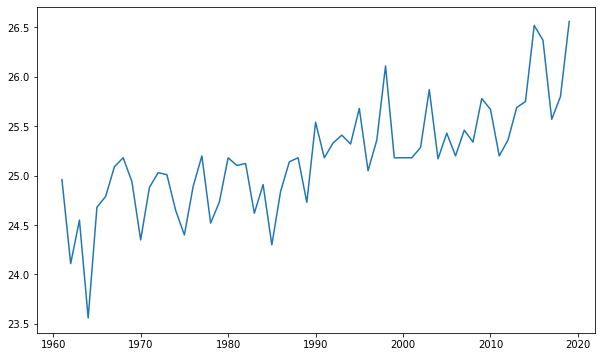

In [87]:
plt.figure(figsize=(10,6))
plt.plot(avg_temp)

### Observando o primeiro e último ano de registros

In [0]:
last = pd.DataFrame(df_years.iloc[-1,:].T)
first = pd.DataFrame(df_years.iloc[0,:].T)

In [99]:
last

,2019
JAN,29.350000
FEB,29.650000
MAR,28.900000
APR,28.050000
MAY,26.600000
JUN,25.100000
JUL,23.250000
AUG,23.050000
SEP,24.950000
OCT,25.900000


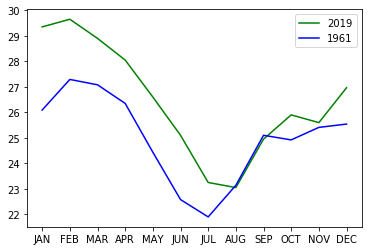

In [156]:
plt.plot(last, color = "green")
plt.plot(first, color = "blue")
plt.legend(["2019","1961"])

In [122]:
print(last.mean())
print(first.mean())

2019    26.446678
dtype: float64
1961    24.986381
dtype: float64


Através desses dados, percebemos que comparados o primeiro e último registro, os anos de 2019 e de 1961, respectivamente, a temperatura média subiu cerca de 1.46 °C com o passar do tempo. Ou seja, aumentou o dobro que a temperatura média do planeta nesse mesmo período 

In [129]:
df_years.shape

(59, 12)

### Visualizando os últimos 10 anos 

In [131]:
last_ten = df_years.iloc[48:59, :]
last_ten

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
2009,27.29,28.60,28.21,26.02,24.67,22.83,23.800000,23.30,25.60,25.43,27.74000,27.137514
2010,29.62,29.50,27.99,26.40,24.86,22.29,23.090000,22.52,23.95,24.44,25.19000,26.391223
2011,28.24,28.61,26.71,26.36,24.20,22.99,22.970000,24.05,23.23,24.16,23.80000,25.850000
2012,26.66,27.58,27.68,27.15,23.65,24.50,23.750000,22.99,23.95,25.40,25.20000,28.440000
2013,27.80,28.40,27.55,25.45,24.85,24.55,23.350000,23.70,24.10,24.65,25.40000,26.500000
2014,28.05,28.75,28.00,26.80,25.20,24.45,22.850000,23.34,24.70,24.55,25.85000,27.400000
2015,28.95,29.05,28.55,26.90,24.30,24.15,23.455846,24.20,26.15,26.65,28.30000,29.050000
2016,27.85,30.00,28.95,28.50,25.70,23.15,23.800000,24.25,24.95,24.80,25.50000,27.600000
2017,29.10,28.40,28.10,26.35,24.30,24.65,21.950000,22.25,23.10,25.85,25.25000,26.700000


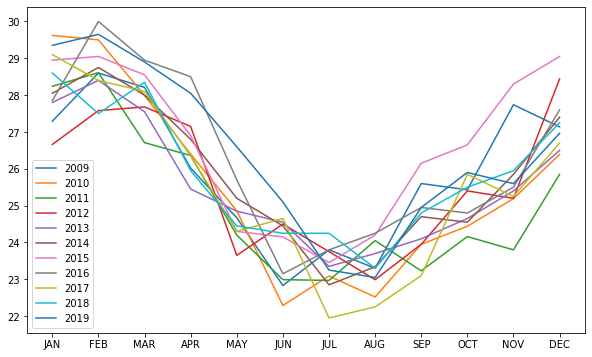

In [159]:
plt.figure(figsize=(10,6))
plt.plot(last_ten.T)
plt.legend(last_ten.index)

Como podemos observar, por mais que as temperaturas variem, ainda é mantido um padrão por conta das estações do ano